<a href="https://colab.research.google.com/github/P3drio/Pedrio_Portfolio/blob/main/ProyectoAnalitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import random # Visualizar imagenes aleatorias 
import matplotlib.pyplot as plt #Graficar
import matplotlib.image as mpimg


# Garbage Classification

La clasificación de la basura se ha convertido en la mejor manera de resolver el problema de la acumulación de residuos en la ciudad, de manera que han surgido algunos sistemas de visión artificial utilizando modelos sofisticados en computo.

Los siguiente artículos, proponen utilizar diferentes algoritmos de machine learning y deep learning .

* **Leboh: An Android Mobile Application for Waste Classification Using TensorFlow Lite**

En este artículo, los autores desarrollan una aplicación móvil Android para la clasificación de residuos utilizando el modelo **EfficientNet-Lite de TensorFlow Lite**. El modelo se entrena y valida utilizando la base de datos *Garbage Classification*. El modelo se evalúa utilizando 655 imágenes del conjunto de datos de prueba y se produce con una precisión del 95,39 %. El entrenamiento y la validación del modelo se realizan en Google Colab (Python). Luego, el modelo se usa como clasificador para una aplicación de Android. 

* **Clean Our City: An Automatic Urban Garbage Classification Algorithm Using Computer Vision and Transfer Learning Technologies**

Este articulo propone un algoritmo basado en **redes InceptionV3** y prueba el algoritmo en un conjunto de datos de clasificación de basura a gran escala. El conjunto de datos se dividió en un 80 % de conjuntos de entrenamiento, un 10 % de conjunto de validación y un 10 % de conjunto de prueba y se utilizó el enfoque de transferencia de aprendizaje. El modelo logró una precisión del 93,125%, lo que resolvió muy bien la clasificación de basura de imágenes.

* **Research of Convolutional Neural Networks in the Problem of Classification of Images of Radioactive Waste**

Este artículo presenta experimentos sobre la aplicabilidad de CNN para esta tarea, se formó un conjunto de datos que contenía las imágenes. Los experimentos realizados confirman la efectividad del uso de redes neuronales convolucionales profundas para esta tarea. El mejor resultado de la clasificación del material lo mostró la red InceptionV3 con una precisión del 89,58%. 

## Referencias

Handhayani, T., & Hendryli, J. (2023). Leboh: An Android Mobile Application for Waste Classification Using TensorFlow Lite. In Proceedings of SAI Intelligent Systems Conference (pp. 53-67). Springer, Cham.


Arhipov, A., & Fomin, I. (2022, May). Research of Convolutional Neural Networks in the Problem of Classification of Images of Radioactive Waste. In 2022 International Conference on Industrial Engineering, Applications and Manufacturing (ICIEAM) (pp. 854-858). IEEE.

Chen, Y., Han, W., Jin, J., Wang, H., Xing, Q., & Zhang, Y. (2021, August). Clean Our City: An Automatic Urban Garbage Classification Algorithm Using Computer Vision and Transfer Learning Technologies. In Journal of Physics: Conference Series (Vol. 1994, No. 1, p. 012022). IOP Publishing.






Este conjunto de datos tiene 15515 imágenes clasificadas en 12 clases diferentes de basura doméstica; papel, cartón, biológico, metal, plástico, vidrio verde, vidrio marrón, vidrio blanco, ropa, zapatos, baterías y basura (en general). Fuente extraída de https://www.kaggle.com/datasets/mostafaabla/garbage-classification



## Objetivo
Clasificar las imágenes de este conjunto de datos en 12 clases puede ser un gran paso para mejorar el proceso de reciclaje.

## Recolección de los datos

1. La categoría de ropa y el 22 % de la categoría de zapatos se obtuvieron del conjunto de datos de ropa https://www.kaggle.com/agrigorev/clothing-dataset-full
2. Alrededor del 29% de las otras 9 clases combinadas se recopiló del conjunto de datos de clasificación de basura https://www.kaggle.com/asdasdasasdas/garbage-classification

3. El resto de imágenes se obtuvieron mediante Web Scrapping.
Todas las imágenes recopiladas mediante web scraping son propiedad de sus fotógrafos/propietarios originales. 

# Paso 1:  Cargar las imagenes en un dataset

In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

! mkdir -p ~/.kaggle1
#! mkdir -p ~/.kaggle !echo '{"username":"{user}","key":"{API key"}'
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


Saving kaggle.json to kaggle (2).json
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           4840        156  1.0              
vittoriogiatti/bigmacprice                                      Bigmac Prices                                        14KB  2022-10-19 21:11:14            985         29  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           3997        116  1.0              
thedevastator/fast-foo

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

 90% 74.0M/82.0M [00:01<00:00, 38.6MB/s]
100% 82.0M/82.0M [00:01<00:00, 56.1MB/s]


In [ ]:
#descomprimir los archivos zip y elimina los archivos .zip
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [ ]:
data = pd.DataFrame()
path='/content/Garbage classification/Garbage classification/'
for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['categoria'] = category
    i = 0
    for photo in os.listdir(path+category):
        temp.loc[i, 'path'] = path+category+ "/" + photo
        temp.loc[i, 'filename'] = category+ "/" + photo
        temp.loc[i, 'categoria'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp
    
print(len(data))

2527


# Paso 2: Pre-procesamiento de los datos

Se observa una mayor cantidad de imágenes para prendas de vestir y zapatos. La basura en general (trash), el vidrio verde y el vidrio cafe son las categorias con menor imágenes.

In [ ]:
data['categoria'].value_counts()



paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: categoria, dtype: int64

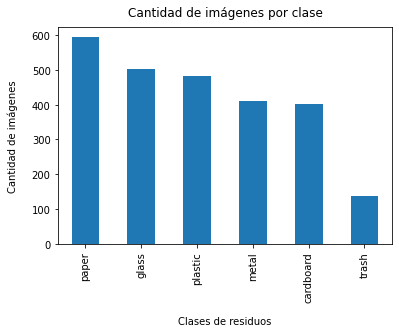

In [ ]:
#Gráfica de barras 
data_visualization = data.copy()
data_visualization['categoria'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Clases de residuos", labelpad=14)
plt.ylabel("Cantidad de imágenes", labelpad=14)
plt.title("Cantidad de imágenes por clase", y=1.02);

In [ ]:
data.info() #no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       2527 non-null   object
 1   categoria  2527 non-null   object
 2   filename   2527 non-null   object
dtypes: object(3)
memory usage: 59.4+ KB


plastic


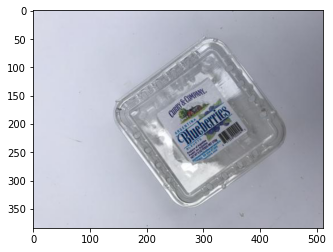

plastic


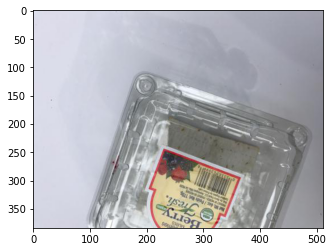

cardboard


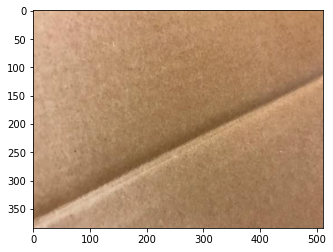

plastic


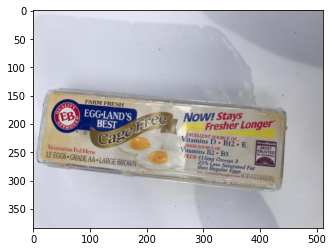

cardboard


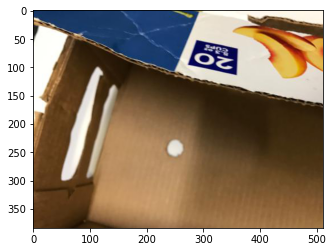

glass


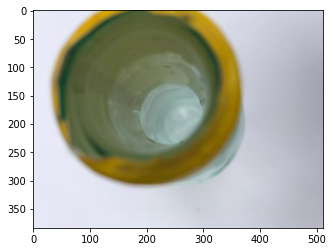

metal


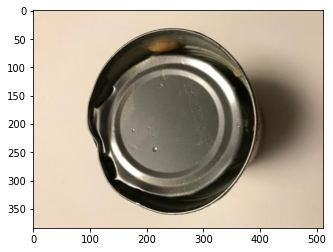

metal


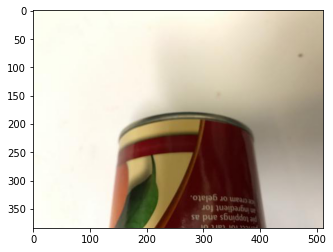

glass


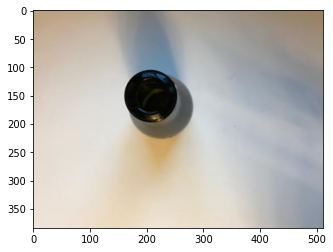

plastic


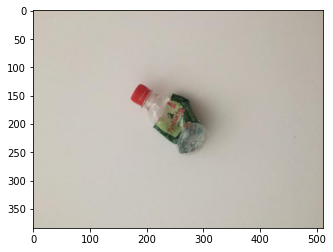

501

In [ ]:
# Gráficas de imagenes aleatorias
for i in range (10):
  random_row = random.randint(0, len(data)-1)
  sample = data.iloc[random_row]
  image = mpimg.imread(sample['path'])
  plt.imshow(image)
  print(sample['categoria'])
  plt.show()

Como las imágenes presentan diferentes tamaños, se sugiere estimar la media de ancho y alto de imagen de una categoria. En particular, se calcula la media de ancho y alto de imagen de la categoria metal para hacer la debida tranformación.

In [ ]:
ancho_me, alto_me = [], []
Medias={'metal': {'ancho': 0,'alto': 0},
        'trash': {'ancho': 0,'alto': 0},
        'glass': {'ancho': 0,'alto': 0},
        'paper': {'ancho': 0,'alto': 0},
        'plastic': {'ancho': 0,'alto': 0},
        'cardboard': {'ancho': 0,'alto': 0}
        }
#print(M[me])       
categorias=pd.unique(data_visualization['categoria'])
print(categorias[1])
path='/content/Garbage classification/Garbage classification/'
#print(path+i+'/'+image_name)
import statistics as st
for i in categorias:
  ancho, alto = [], []
  for image_name in os.listdir(path+i+'/'):
    img = plt.imread(path+i+'/'+image_name)
    w, h, c = img.shape
    ancho.append(w)
    alto.append(h)
  Medias[i]['ancho']=st.mean(ancho)
  print(Medias[i]['alto']=st.mean(alto))
  print('Media ancho categoria '+i+': {}'.format(st.mean(ancho)))
  print('Media altura categoria '+i+': {}'.format(st.mean(alto)))

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
